# Plan

* ~~get new data from train (if available) or old one (if not): http://otrain.org/files/xl/~~
* ~~clean the excel file: remove empty rows. english column names.~~
* ~~try to load the whole excel file~~
* ~~add time at station col~~
* ~~time in station for actual stopped True and Falses~~
* histogram of time in station
* Time at station planned to actual




In [10]:
# library for loading data and tables
# we will use it a lot, so we use its standard abbreviation - pd
import pandas as pd
import numpy as np

# plotting library
# loading it changes default styles to much nicer ones
# import seaborn as sns

# IPython Notebook option to show plots in the notebook (not in a separate window)
%matplotlib inline

In [58]:
# reading time: 1 loops, best of 3: 6min 3s per loop
df = pd.read_excel("data/otrain/2015_04_05_06.xlsx", skip_footer=400000)

In [59]:
df.count()

Train_Date             75458
Train_Number           75458
Planned                75458
Station_number         75458
Station_Description    75458
Station_Order          75458
Route_Description      75458
Station_typ            75458
Planned_Stop           60144
Actual_Stop            60130
Planned_Depratur       71000
Actual_Departure       70991
Planned_Arrival        71013
Actual_Arrival         71005
dtype: int64

In [24]:
print(pd.unique(df['Planned'].ravel()))
print(pd.unique(df['Station_typ'].ravel()))

['מתוכננת' 'לא מתוכננת']
['מוצא' 'ביניים' 'יעד מסחרי' 'מוצא תפעולי' 'מוצא מסחרי' 'יעד' 'יעד תפעולי']


In [28]:
# Clean up data 
df['Planned_Stop'].fillna(0, inplace=True)
df['Actual_Stop'].fillna(0, inplace=True)
di = {'מתוכננת': True, 'לא מתוכננת': False}
df.replace({"Planned": di}, inplace=True)
df.head()

,Train_Date,Train_Number,Planned,Station_number,Station_Description,Station_Order,Route_Description,Station_typ,Planned_Stop,Actual_Stop,Planned_Depratur,Actual_Departure,Planned_Arrival,Actual_Arrival
0,2015-04-01,1,True,1600,נהריה,1,נהריה - נתבג,מוצא,1,1,2015-04-01 23:13:00,2015-04-01 23:13:52,NaT,NaT
1,2015-04-01,1,True,1500,עכו,2,נהריה - נתבג,ביניים,1,1,2015-04-01 23:23:00,2015-04-01 23:23:11,2015-04-01 23:21:00,2015-04-01 23:21:04
2,2015-04-01,1,True,800,קרית מוצקין,5,נהריה - נתבג,ביניים,1,1,2015-04-01 23:33:00,2015-04-01 23:32:08,2015-04-01 23:32:00,2015-04-01 23:31:19
3,2015-04-01,1,True,700,קרית חיים,6,נהריה - נתבג,ביניים,0,0,2015-04-01 23:36:00,2015-04-01 23:34:38,2015-04-01 23:36:00,2015-04-01 23:34:38
4,2015-04-01,1,True,1300,חוצות מפרץ,7,נהריה - נתבג,ביניים,0,0,2015-04-01 23:37:00,2015-04-01 23:35:31,2015-04-01 23:37:00,2015-04-01 23:35:31


In [37]:
print(df[df.Planned==False].count())
df[df.Planned==False].drop(["Station_number", "Station_Order"], axis=1)

Train_Date             116
Train_Number           116
Planned                116
Station_number         116
Station_Description    116
Station_Order          116
Route_Description      116
Station_typ            116
Planned_Stop           116
Actual_Stop            116
Planned_Depratur       107
Actual_Departure       107
Planned_Arrival        107
Actual_Arrival         107
dtype: int64


,Train_Date,Train_Number,Planned,Station_Description,Route_Description,Station_typ,Planned_Stop,Actual_Stop,Planned_Depratur,Actual_Departure,Planned_Arrival,Actual_Arrival
6942,2015-04-01,8536,False,ירושלים מלחה,הרצליה- ירושלים מלחה,מוצא,1,1,2015-04-01 00:01:00,2015-03-31 23:59:08,NaT,NaT
6943,2015-04-01,8536,False,ירושלים גן חיות,הרצליה- ירושלים מלחה,ביניים,0,0,2015-04-01 00:05:00,2015-04-01 23:59:59,2015-04-01 00:05:00,2015-04-01 23:59:59
6944,2015-04-01,8536,False,בית שמש,הרצליה- ירושלים מלחה,ביניים,1,1,2015-04-01 00:46:00,2015-04-01 00:38:26,2015-04-01 00:45:00,2015-04-01 00:35:35
6945,2015-04-01,8536,False,רמלה,הרצליה- ירושלים מלחה,ביניים,0,0,2015-04-01 01:05:00,2015-04-01 00:56:13,2015-04-01 01:05:00,2015-04-01 00:56:13
6946,2015-04-01,8536,False,לוד,הרצליה- ירושלים מלחה,ביניים,1,1,2015-04-01 01:08:00,2015-04-01 01:01:12,2015-04-01 01:07:00,2015-04-01 00:58:36
6947,2015-04-01,8536,False,לוד-גני אביב,הרצליה- ירושלים מלחה,ביניים,0,0,2015-04-01 01:08:00,2015-04-01 01:03:55,2015-04-01 01:08:00,2015-04-01 01:03:55
6948,2015-04-01,8536,False,כפר חבד,הרצליה- ירושלים מלחה,ביניים,0,0,2015-04-01 01:10:00,2015-04-01 01:05:18,2015-04-01 01:10:00,2015-04-01 01:05:18
6949,2015-04-01,8536,False,תל אביב ההגנה,הרצליה- ירושלים מלחה,ביניים,1,1,2015-04-01 01:16:00,2015-04-01 01:16:11,2015-04-01 01:15:00,2015-04-01 01:11:46
6950,2015-04-01,8536,False,השלום,הרצליה- ירושלים מלחה,ביניים,1,1,2015-04-01 01:17:00,2015-04-01 01:21:15,2015-04-01 01:16:00,2015-04-01 01:19:25
6951,2015-04-01,8536,False,תל אביב מרכז,הרצליה- ירושלים מלחה,יעד,1,1,NaT,NaT,2015-04-01 01:18:00,2015-04-01 01:23:45


In [68]:
df["Time_At_Station"] = (df["Actual_Departure"] - df["Actual_Arrival"]) / np.timedelta64(1, 's')
df["Planned_At_Station"] = (df["Planned_Depratur"] - df["Planned_Arrival"]) / np.timedelta64(1, 's')
df["Arrival_offset"] = (df["Actual_Arrival"] - df["Planned_Arrival"]) / np.timedelta64(1, 's')
df["Departure_offset"] = (df["Actual_Departure"] - df["Planned_Depratur"]) / np.timedelta64(1, 's')
df.head()

,Train_Date,Train_Number,Planned,Station_number,Station_Description,Station_Order,Route_Description,Station_typ,Planned_Stop,Actual_Stop,Planned_Depratur,Actual_Departure,Planned_Arrival,Actual_Arrival,Time_At_Station,Arrival_offset,Departure_offset,Planned_At_Station
0,2015-04-01,1,מתוכננת,1600,נהריה,1,נהריה - נתבג,מוצא,1,1,2015-04-01 23:13:00,2015-04-01 23:13:52,NaT,NaT,NaN,NaN,52,NaN
1,2015-04-01,1,מתוכננת,1500,עכו,2,נהריה - נתבג,ביניים,1,1,2015-04-01 23:23:00,2015-04-01 23:23:11,2015-04-01 23:21:00,2015-04-01 23:21:04,127,4,11,120
2,2015-04-01,1,מתוכננת,800,קרית מוצקין,5,נהריה - נתבג,ביניים,1,1,2015-04-01 23:33:00,2015-04-01 23:32:08,2015-04-01 23:32:00,2015-04-01 23:31:19,49,-41,-52,60
3,2015-04-01,1,מתוכננת,700,קרית חיים,6,נהריה - נתבג,ביניים,NaN,NaN,2015-04-01 23:36:00,2015-04-01 23:34:38,2015-04-01 23:36:00,2015-04-01 23:34:38,0,-82,-82,0
4,2015-04-01,1,מתוכננת,1300,חוצות מפרץ,7,נהריה - נתבג,ביניים,NaN,NaN,2015-04-01 23:37:00,2015-04-01 23:35:31,2015-04-01 23:37:00,2015-04-01 23:35:31,0,-89,-89,0


In [67]:
# are there trains that didn't stop but have time at station?
df[(df.Actual_Stop==0) & (df.Time_At_Station != 0)].count()

Train_Date             0
Train_Number           0
Planned                0
Station_number         0
Station_Description    0
Station_Order          0
Route_Description      0
Station_typ            0
Planned_Stop           0
Actual_Stop            0
Planned_Depratur       0
Actual_Departure       0
Planned_Arrival        0
Actual_Arrival         0
Time_At_Station        0
Arrival_offset         0
Departure_offset       0
dtype: int64

86590.0


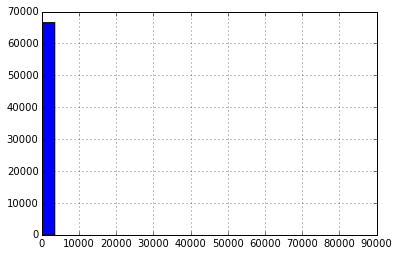

In [71]:
print (df["Time_At_Station"].max())
df["Time_At_Station"].hist(bins=25)